In [ ]:
# Importing Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,mean_squared_error ,accuracy_score , classification_report

In [ ]:
# Loading Data Sets
digits = load_digits() # Data set
df = pd.DataFrame(digits.data , columns= digits.feature_names)
print(df.head()) # show first 5 rows and columns 

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0

In [ ]:
df.shape # Number of rows and columns 


(1797, 64)

In [ ]:
df.describe() # show Min , Max , Std , count ... 

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
df.isnull().sum() # Missing Values 

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

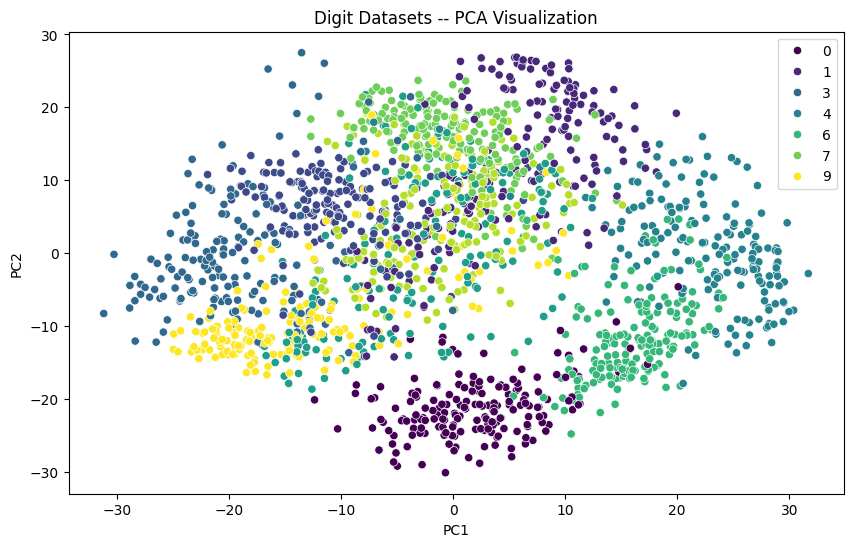

In [15]:
X = digits.data
y = digits.target
pca = PCA(n_components= 2)
X_pca= pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca , columns= ['PC1','PC2'] )
df_pca['target'] = y

plt.figure(figsize= (10 ,6))
sns.scatterplot(data = df_pca , x = 'PC1' ,y = 'PC2' ,hue = 'target' ,palette= 'viridis')
plt.title("Digit Datasets -- PCA Visualization")
plt.legend()
plt.show()






In [18]:
X_train , X_test ,y_train ,y_test = train_test_split(X , y , test_size= 0.2 ,random_state = 42)
model = LinearRegression()
model.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(X_test)

y_pred_digits = np.round(y_pred).astype(int)
y_pred_digits = np.clip(y_pred_digits , 0 , 9) # Ensure between 0 to 9 

accuracy = accuracy_score(y_test ,y_pred_digits)
print(f'Accuracy : {accuracy:.4f}')

print("\nFirst 10 Predictions")
print("predicted :",y_pred_digits[ : 10])
print("Actual :" ,y_test[:10])


Accuracy : 0.2194

First 10 Predictions
predicted : [8 6 5 6 3 4 4 2 5 2]
Actual : [6 9 3 7 2 1 5 2 5 2]


In [1]:
plt.figure(figsize= (10 ,8))
plt.subplot(1 ,2 ,1)
plt.scatter(range(10), y_test[:10], color = 'red', label = 'Actual', s= 100)
plt.scatter(range(10),y_pred_digits ,color = 'blue',label = 'prediction', s= 100 )
plt.title('First 10 Prediction')
plt.xlabel("")
plt.ylabel("")
plt.legend()



NameError: name 'plt' is not defined